# Análisis de datos - Trabajo Práctico 1: Burnout de empleados corporativos

# 1. Carga y Análisis Inicial de datos

In [ ]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

In [482]:
# leer datos de un archivo CSV
df = pd.read_csv('enriched_employee_dataset.csv')

In [475]:
# Número total de filas y columnas
# Mostrar las primeras filas del DataFrame
df.head(4)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

## Categorización de variables

| Variable                   | Tipo           | Subtipo      | Tipo de dato pandas  | Descripción y Rango de Valores                                 |
|---------------------------|----------------|--------------|----------------------|---------------------------------------------------------------|
| Employee ID                | Cualitativa    | Nominal      | object               | Identificador único del empleado - *Candidata a eliminación*  |
| Date of Joining            | Cuantitativa   | -            | datetime64[ns]       | Fecha de ingreso del empleado - *Requiere conversión a datetime* |
| Gender                     | Cualitativa    | Nominal      | category             | Género del empleado (Male, Female) - *Convertir a category*   |
| Company Type               | Cualitativa    | Nominal      | category             | Tipo de empresa (Service, Product) - *Convertir a category*   |
| WFH Setup Available        | Cualitativa    | Nominal      | category             | Disponibilidad de trabajo desde casa (Yes, No) - *Convertir a category* |
| Designation                | Cuantitativa   | Discreta     | int64                | Nivel jerárquico del empleado (Rango: 0 a 5)                  |
| Resource Allocation        | Cuantitativa   | Continua     | float64              | Asignación de recursos (Rango: 1.0 a 10.0) - *Valores nulos*  |
| Mental Fatigue Score       | Cuantitativa   | Continua     | float64              | Nivel de fatiga mental (Rango: 0.0 a 10.0) - *Valores nulos*  |
| Burn Rate                  | Cuantitativa   | Continua     | float64              | **Variable objetivo** - Nivel de burnout (Rango: 0.0 a 1.0)   |
| Years in Company           | Cuantitativa   | Discreta     | int64                | Años de antigüedad (Rango: 16 a 17)                           |
| Work Hours per Week        | Cuantitativa   | Discreta     | int64                | Horas laborales semanales (Rango: 35 a 59)                    |
| Sleep Hours                | Cuantitativa   | Continua     | float64              | Horas de sueño diarias (Rango: 3.4 a 9.1)                     |
| Work-Life Balance Score    | Cuantitativa   | Ordinal      | int64                | Equilibrio trabajo-vida (Escala: 1 a 5)                       |
| Manager Support Score      | Cuantitativa   | Ordinal      | int64                | Nivel de apoyo del manager (Escala: 1 a 5)                    |
| Deadline Pressure Score    | Cuantitativa   | Ordinal      | int64                | Nivel de presión por plazos (Escala: 1 a 5)                   |
| Team Size                  | Cuantitativa   | Discreta     | int64                | Número de integrantes del equipo (Rango: 3 a 19)              |
| Recognition Frequency      | Cuantitativa   | Ordinal      | int64                | Frecuencia de reconocimiento (Escala: 0 a 5)                  |

### Observaciones preliminares

 #### Date of Joining: es un object, debería ser un datetime.
 #### Gender: es un object, debería ser category.
 #### Company type: es un object, debería ser category
 #### WFH setup Available: es un object, debería ser category.
 #### Employee ID: es un object, debería ser category, pero la variable no aporta ningún valor al modelo, evaluar su eliminación.
 #### Evaluar Years in Company y Date of Joining, ya que todos los empleados se unieron hace 16 o 17 años a la empresa


# 2. Cleanup del dataset

## Conversión de tipos

In [483]:
# Calcular el porcentaje de filas donde 'Years in Company' es igual a 16
total_rows = len(df)
rows_with_16 = len(df[df['Years in Company'] == 16])
percentage = (rows_with_16 / total_rows) * 100

print(f"Porcentaje de filas donde Years In Company = 16: {percentage:.2f}%")

Porcentaje de filas donde Years In Company = 16: 98.40%


In [484]:
# Convertir las columnas del tipo object a datetime y category para poder trabajar con ellas
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Gender'] = df['Gender'].astype('category')
df['Company Type'] = df['Company Type'].astype('category')
df['WFH Setup Available'] = df['WFH Setup Available'].astype('category')
# Eliminar la columna Employee ID, ya que no aporta informacion valiosa
df = df.drop(columns=['Employee ID'])
# Se observa que el 98,4 de los empleados tienen 16 años en la empresa, por lo que el porcentaje de 
# empleados con 17 años en la empresa es muy bajo, lo cuál no tiene impacto en la muestra, por lo que se decide eliminar 
# la columna 'Years in Company' y por consecuencia la columna 'Date of Joining' ya que no aporta información relevante para el análisis.
df = df.drop(columns=['Date of Joining'])
df = df.drop(columns=['Years in Company'])


# Verificación de los tipos post cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   22750 non-null  category
 1   Company Type             22750 non-null  category
 2   WFH Setup Available      22750 non-null  category
 3   Designation              22750 non-null  int64   
 4   Resource Allocation      21369 non-null  float64 
 5   Mental Fatigue Score     20633 non-null  float64 
 6   Burn Rate                21626 non-null  float64 
 7   Work Hours per Week      22750 non-null  int64   
 8   Sleep Hours              22750 non-null  float64 
 9   Work-Life Balance Score  22750 non-null  int64   
 10  Manager Support Score    22750 non-null  int64   
 11  Deadline Pressure Score  22750 non-null  int64   
 12  Team Size                22750 non-null  int64   
 13  Recognition Frequency    22750 non-null  int64   
dtypes: cat

In [485]:
# Descripción del data set post limpieza inicial 
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
count,22750.000000,21369.000000,20633.000000,21626.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,47.364747,6.153965,2.595604,2.874681,3.400132,11.058022,1.819473
std,1.135145,2.047211,1.920839,0.198226,7.651106,0.892709,1.402847,1.281129,1.409178,4.907718,1.713508
min,0.000000,1.000000,0.000000,0.000000,35.000000,3.400000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000,40.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000
max,5.000000,10.000000,10.000000,1.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000


## Análisis de nulos y duplicados

In [486]:
# Revisar faltantes
print("\nValores faltantes:")
print(df.isna().sum())
# Calcular la proporció de de valores nulos en cada columna
print("\nPorcentaje faltantes:")
print(df.isna().mean().round(4)*100) # round(4) redondea a 4 decimales
# revisar duplicados
print(df.duplicated().sum())




Valores faltantes:
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64

Porcentaje faltantes:
Gender                     0.00
Company Type               0.00
WFH Setup Available        0.00
Designation                0.00
Resource Allocation        6.07
Mental Fatigue Score       9.31
Burn Rate                  4.94
Work Hours per Week        0.00
Sleep Hours                0.00
Work-Life Balance Score    0.00
Manager Support Score      0.00
Deadline Pressure Score    0.00
Team Size                  0.00
Recognition Frequency      0.00
dtype: float64
0


<Axes: >

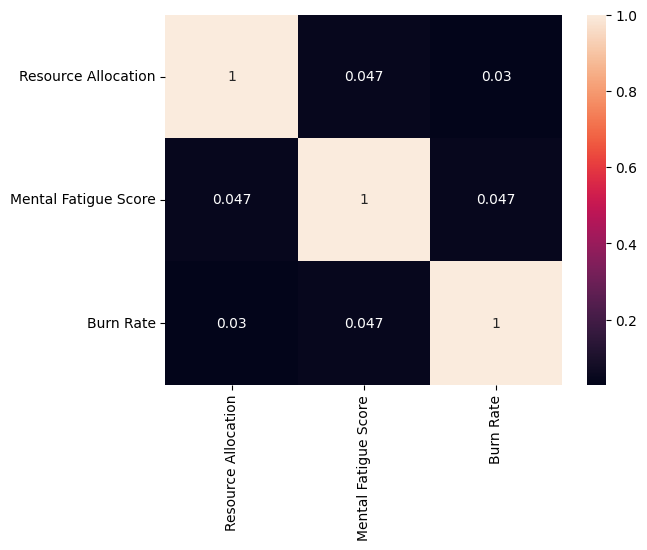

In [487]:
# Correlación entre los nulos
missing_corr = df[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().corr()
sns.heatmap(missing_corr, annot=True)

 Se observa que el heatmap no muestra una correlación fuerte entre los valores nulos, no hay dependencia entre ellos.
 Se procede a realizar otras técnicas de visualización

Text(0.5, 1.0, 'Dendrograma de datos nulos')

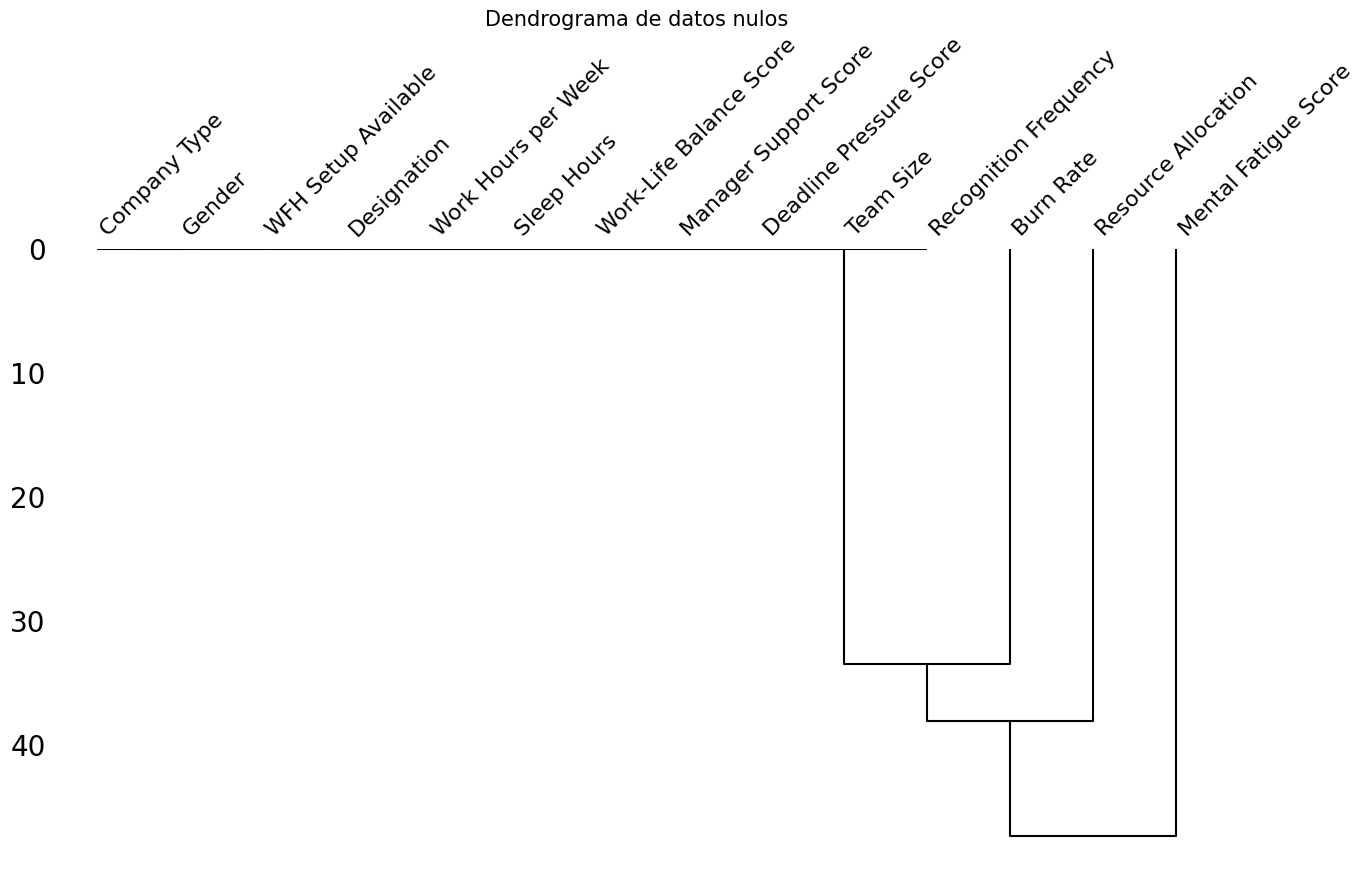

In [488]:
# Dendograma
msno.dendrogram(df, figsize=(15,8))
plt.title("Dendrograma de datos nulos", fontsize=15)

### Conclusión General (Dendrograma + Heatmap)

Al analizar los patrones de datos faltantes, podemos ver que no siguen una relación estrictamente lineal. Por ejemplo, en el dendrograma se observa que variables como "Resource Allocation", "Mental Fatigue Score" y "Burn Rate" tienden a tener ausencias en registros similares, aunque no en todos exactamente los mismos casos. Esto puede indicar que existe alguna razón común por la cual estos datos faltan, quizás relacionada con situaciones donde ciertos empleados no completan esos apartados, por ejemplo, cuando tienen una alta carga laboral y no reportan detalles como fatiga mental o asignación de recursos.

Por otro lado, el heatmap muestra que no hay una correlación fuerte entre las ausencias de diferentes variables, lo que significa que la falta de datos en una variable no implica automáticamente que también falta en otra. En resumen, los patrones de ausencias parecen ser más dispersos y no siguen un patrón matemático simple, sino que podrían estar influenciados por otros factores no evidentes en los datos.


### Tranformación de variables categóricas a numéricas
El heatmap de correlaciones requiere variables numéricas.
Las variables categóricas originales (Gender, Company Type, etc.) no pueden incluirse en una matriz de correlación estándar hasta que se codifican.
Por eso se procede a codificar las variables utilizando one hot encoding

In [489]:
# Aplicar One-Hot Encoding a las variables categóricas nominales
df_encoded = pd.get_dummies(
    df,
    columns=["Gender", "Company Type", "WFH Setup Available"],
    drop_first=True  # Para evitar multicolinealidad
)

# Convertir las columnas codificadas a enteros (1/0)
for col in df_encoded.columns:
    if df_encoded[col].dtype == "bool":
        df_encoded[col] = df_encoded[col].astype(int)

# Verificación
print(df_encoded.head())

   Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0            2                  3.0                   3.8       0.16   
1            1                  2.0                   5.0       0.36   
2            2                  NaN                   5.8       0.49   
3            1                  1.0                   2.6       0.20   
4            3                  7.0                   6.9       0.52   

   Work Hours per Week  Sleep Hours  Work-Life Balance Score  \
0                   35          7.5                        3   
1                   41          7.1                        5   
2                   53          5.7                        2   
3                   43          6.7                        3   
4                   51          5.2                        1   

   Manager Support Score  Deadline Pressure Score  Team Size  \
0                      3                        1         16   
1                      3                        3     

### Matriz de Correlación
Para abordar la imputación de valores faltantes de forma efectiva, es fundamental analizar las relaciones sistemáticas entre las variables y los posibles patrones de missingness. La eliminación o imputación arbitraria de registros incompletos puede introducir sesgos significativos, particularmente si los datos faltantes siguen un mecanismo no aleatorio (MNAR o MAR).

La matriz de correlación se implementa como herramienta diagnóstica clave para:

Identificar variables correlacionadas con los patrones de faltantes (ej: mayor tasa de nulos en Mental Fatigue Score cuando Work Hours es alto)

Detectar relaciones predictivas potenciales que permitan usar variables completas para estimar los valores faltantes

Evaluar riesgos de dependencia jerárquica (ej: nulos concentrados en cierto Designation o Company Type)


Correlaciones con Resource Allocation:
Resource Allocation        1.00
Designation                0.88
Burn Rate                  0.86
Mental Fatigue Score       0.81
Work Hours per Week        0.57
Deadline Pressure Score    0.56
Gender_Male                0.14
Team Size                  0.01
Company Type_Service       0.00
WFH Setup Available_Yes   -0.28
Manager Support Score     -0.48
Sleep Hours               -0.52
Recognition Frequency     -0.55
Work-Life Balance Score   -0.56
Name: Resource Allocation, dtype: float64

Correlaciones con Mental Fatigue Score:
Mental Fatigue Score       1.00
Burn Rate                  0.95
Resource Allocation        0.81
Designation                0.70
Work Hours per Week        0.66
Deadline Pressure Score    0.64
Gender_Male                0.14
Team Size                  0.00
Company Type_Service       0.00
WFH Setup Available_Yes   -0.28
Manager Support Score     -0.55
Sleep Hours               -0.60
Recognition Frequency     -0.63
Work-Life Bal

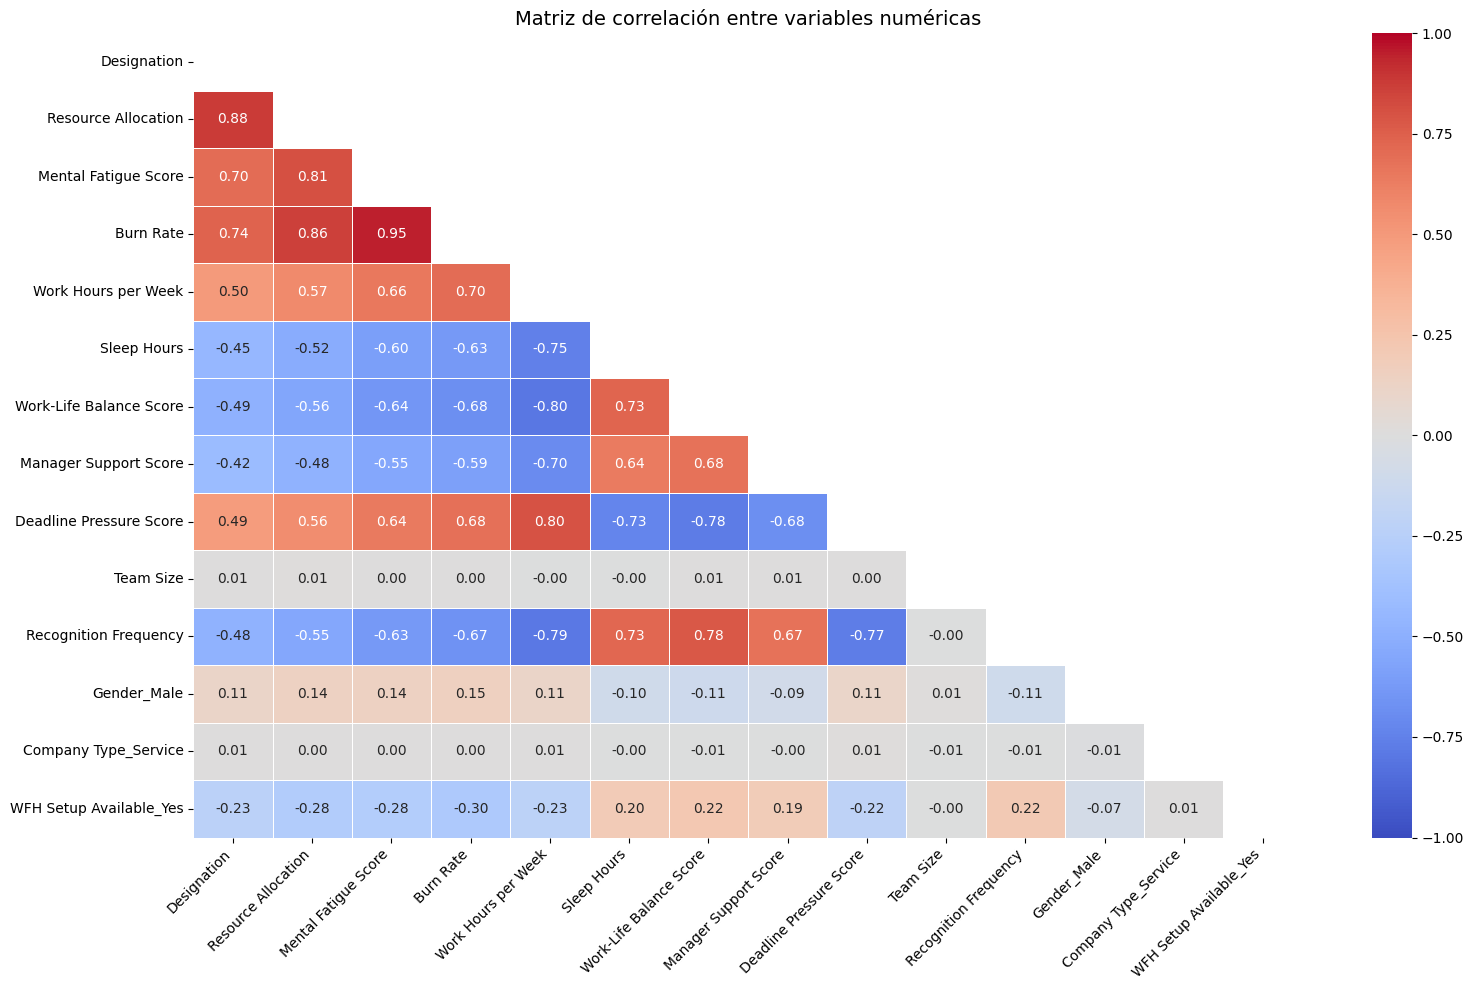

In [525]:
# Calcular matriz de correlación
corr_matrix = df_encoded.corr(numeric_only=True)

# Imprimir valores de correlación con Resource Allocation
print("\nCorrelaciones con Resource Allocation:")
print(corr_matrix['Resource Allocation'].sort_values(ascending=False).round(2))
# Imprimir valores de correlación con Mental Fatigue Score
print("\nCorrelaciones con Mental Fatigue Score:")
print(corr_matrix['Mental Fatigue Score'].sort_values(ascending=False).round(2))
# Imprimir valores de correlación con Burn Rate
print("\nCorrelaciones con Burn Rate:")
print(corr_matrix['Burn Rate'].sort_values(ascending=False).round(2))
print("\nMatriz de correlación completa:")
print(corr_matrix.round(2))

# Configurar el heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
)
plt.title("Matriz de correlación entre variables numéricas", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Agrupar nulos por grupo para evaluar posibles tendencias o relaciones

Basado en la matriz de correlaciones, donde se observa que variables con valores nulos, tienen una alta correlación con otras variables. Lo que puede indicar que los datos sean MAR, es decir que la probabilidad de un valor faltante pueda explicarse mediante otras variables. 
Es por esto que se decide agrupar variables nulas por grupos de variables relacionadas, para intentar identificar un patrón.

In [492]:
def nulos_por_grupo(df, grupo_col, target_col, bins=5):
    # Para variables numéricas, crear grupos con bins
    if np.issubdtype(df[grupo_col].dtype, np.number):
        df['grupo'] = pd.qcut(df[grupo_col], bins, duplicates='drop')
    else:
        df['grupo'] = df[grupo_col]
        
    return df.groupby('grupo', observed=True)[target_col].apply(
        lambda x: f"{x.isnull().sum()} nulos ({x.isnull().mean()*100:.1f}%)"
    ).to_frame("Nulos en " + target_col)

# ----------------------------------------------------------
# Análisis para Resource Allocation (Top 5 correlaciones)
# ----------------------------------------------------------
print("ANÁLISIS DE VALORES NULOS EN RESOURCE ALLOCATION")
print("="*50)

top_variables_ra = ['Designation', 'Burn Rate', 'Mental Fatigue Score', 
                   'Work Hours per Week', 'Deadline Pressure Score']

for var in top_variables_ra:
    print(f"\nPor {var}:")
    print(nulos_por_grupo(df_encoded, var, 'Resource Allocation'))
    print("-"*50)

# ----------------------------------------------------------
# Análisis para Mental Fatigue Score (Top 5 correlaciones)
# ----------------------------------------------------------
print("\n"+"="*50)
print("ANÁLISIS DE VALORES NULOS EN MENTAL FATIGUE SCORE")
print("="*50)

top_variables_mf = ['Burn Rate', 'Resource Allocation', 'Designation',
                   'Work Hours per Week', 'Deadline Pressure Score']

for var in top_variables_mf:
    print(f"\nPor {var}:")
    print(nulos_por_grupo(df_encoded, var, 'Mental Fatigue Score'))
    print("-"*50)

# ----------------------------------------------------------
# Análisis para Burn Rate (Top 5 correlaciones)
# ----------------------------------------------------------
print("\n"+"="*50)
print("ANÁLISIS DE VALORES NULOS EN BURN RATE")
print("="*50)

top_variables_br = ['Mental Fatigue Score', 'Resource Allocation', 'Designation',
                   'Work Hours per Week', 'Deadline Pressure Score']

for var in top_variables_br:
    print(f"\nPor {var}:")
    print(nulos_por_grupo(df_encoded, var, 'Burn Rate'))
    print("-"*50)

# ----------------------------------------------------------
# Análisis adicional para variables con correlación negativa
# ----------------------------------------------------------
print("\n"+"="*50)
print("ANÁLISIS DE CORRELACIONES NEGATIVAS RELEVANTES")
print("="*50)

neg_corr_vars = {
    'Resource Allocation': ['Work-Life Balance Score', 'Recognition Frequency', 'Sleep Hours'],
    'Mental Fatigue Score': ['Work-Life Balance Score', 'Recognition Frequency', 'Manager Support Score'],
    'Burn Rate': ['Work-Life Balance Score', 'Recognition Frequency', 'Manager Support Score']
}

for target_var, vars_list in neg_corr_vars.items():
    print(f"\nPara {target_var}:")
    for var in vars_list:
        print(f"\nPor {var}:")
        print(nulos_por_grupo(df_encoded, var, target_var))
        print("-"*50)

ANÁLISIS DE VALORES NULOS EN RESOURCE ALLOCATION

Por Designation:
              Nulos en Resource Allocation
grupo                                     
(-0.001, 1.0]             381 nulos (6.0%)
(1.0, 2.0]                480 nulos (6.3%)
(2.0, 3.0]                355 nulos (5.9%)
(3.0, 5.0]                165 nulos (5.9%)
--------------------------------------------------

Por Burn Rate:
               Nulos en Resource Allocation
grupo                                      
(-0.001, 0.28]             268 nulos (6.0%)
(0.28, 0.4]                267 nulos (6.1%)
(0.4, 0.5]                 252 nulos (6.0%)
(0.5, 0.62]                246 nulos (5.6%)
(0.62, 1.0]                245 nulos (5.9%)
--------------------------------------------------

Por Mental Fatigue Score:
              Nulos en Resource Allocation
grupo                                     
(-0.001, 4.2]             256 nulos (6.0%)
(4.2, 5.4]                236 nulos (5.6%)
(5.4, 6.3]                233 nulos (5.8%)
(6.3, 7

### Análisis de Valores Faltantes en el Dataset

### Valores Faltantes en Resource Allocation
El análisis muestra una distribución de valores faltantes en diferentes variables:

#### Por Nivel de Designación
- **Nivel 0-1**: 381 nulos (6.0%)
- **Nivel 1-2**: 480 nulos (6.3%)
- **Nivel 2-3**: 355 nulos (5.9%)
- **Nivel 3-5**: 165 nulos (5.9%)

#### Por Tasa de Agotamiento (Burn Rate)
- **Bajo (0-0.28)**: 290 nulos (6.2%)
- **Medio-Bajo (0.28-0.4)**: 291 nulos (6.2%)
- **Medio (0.4-0.5)**: 280 nulos (6.3%)
- **Medio-Alto (0.5-0.62)**: 264 nulos (5.7%)
- **Alto (0.62-1.0)**: 256 nulos (6.0%)

#### Por Horas de Trabajo
- **35-39 hrs**: 320 nulos (6.4%)
- **39-44 hrs**: 318 nulos (6.4%)
- **44-51 hrs**: 236 nulos (5.4%)
- **51-55 hrs**: 259 nulos (6.2%)
- **55-59 hrs**: 248 nulos (5.8%)

---

### Valores Faltantes en Mental Fatigue Score
Se observan porcentajes de faltantes ligeramente mayores:

#### Por Tasa de Agotamiento
- **Bajo (0-0.28)**: 457 nulos (9.8%)
- **Medio-Bajo (0.28-0.4)**: 437 nulos (9.4%)
- **Medio (0.4-0.5)**: 393 nulos (8.8%)
- **Medio-Alto (0.5-0.62)**: 435 nulos (9.4%)
- **Alto (0.62-1.0)**: 395 nulos (9.2%)

#### Por Nivel de Designación
- **Nivel 0-1**: 609 nulos (9.5%)
- **Nivel 1-2**: 666 nulos (8.8%)
- **Nivel 2-3**: 562 nulos (9.4%)
- **Nivel 3-5**: 280 nulos (10.0%)

---

### Hallazgos Clave
1. **Resource Allocation**  
   - Valores faltantes relativamente consistentes (5.4-6.4%) en todas las categorías
   - Sin patrones fuertes relacionados con horas de trabajo o presión laboral

2. **Mental Fatigue Score**  
   - Tasas de faltantes más altas (8.8-10.0%)
   - Mayor porcentaje en niveles altos de designación (10.0% en nivel 3-5)

3. **Patrones Generales**  
   - **Burn Rate** no presenta valores faltantes en ninguna categoría
   - Los niveles altos de designación muestran patrones diferenciados
   - Los valores faltantes no son completamente aleatorios (**MCAR**),  
     sino que podrían relacionarse con características de los empleados  
     o condiciones laborales (**MAR**)


### Análisis e imputación para burn rate

Se observa que burn rate tiene correlaciones fuertes con distintas variables:
Mental Fatigue Score       0.94
Resource Allocation        0.86
Designation                0.74
Work Hours per Week        0.72
Deadline Pressure Score    0.71
Sleep Hours               -0.66
Recognition Frequency     -0.70
Work-Life Balance Score   -0.71

Esta variable es la que mayor cantidad de relaciones fuertes tiene en el dataset. Al tratarse de la variable objetivo, es la variable más sensible del dataset, por lo que la decisión de imputar o no va a depender de que tan seguro y efectivo sea el método de imputación utilizado. 
Teniendo en cuenta que la variable burn rate tiene patrones asociados a variables observables MAR, y tiene relaciones entre variables complejas y no lineales, y que existen nulos en otras columnas que tienen una alta correlacion con Burn Rate, el método MICE es una excelente opción ya que esta diseñado para trabajar con datasets donde múltiples variables tienen valores faltantes, preservando las relaciones estadísticas y minimizango el sesgo. 

Estadísticas - Burn Rate Original vs Imputado
           Original      Imputado
count  22750.000000  22750.000000
mean       0.450107      0.450107
std        0.196928      0.196928
min        0.000000      0.000000
25%        0.310000      0.310000
50%        0.450000      0.450000
75%        0.580000      0.580000
max        1.000000      1.000000


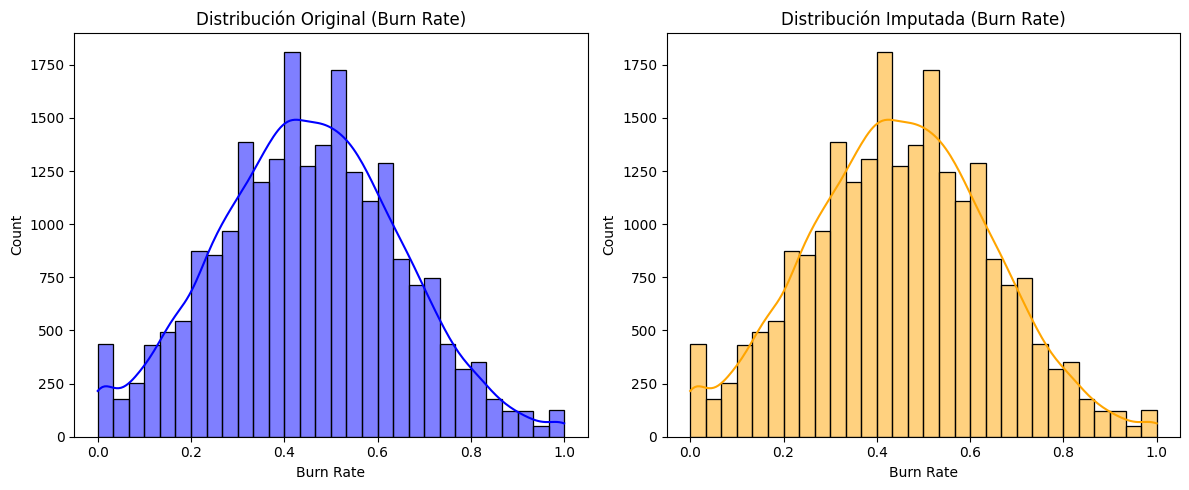


Valores faltantes en Burn Rate después de imputación: 0


In [495]:
# Imputacion de valores nulos para burn rate
original_burn = df_encoded['Burn Rate'].copy()

#  Definir variables relevantes para la imputación

vars_para_imputar = [
    'Burn Rate',             
    'Mental Fatigue Score',       
    'Resource Allocation',     
    'Designation',                
    'Work Hours per Week',        
    'Work-Life Balance Score',    
    'Recognition Frequency'       
]

# Crear subconjunto para MICE
df_mice = df_encoded[vars_para_imputar].copy()
imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = imputer.fit_transform(df_mice)
df_imputed = pd.DataFrame(df_imputed, columns=vars_para_imputar)

df_encoded['Burn Rate'] = df_imputed['Burn Rate'].clip(lower=0, upper=1)

# Comparación estadística
print("Estadísticas - Burn Rate Original vs Imputado")
print(pd.DataFrame({
    'Original': original_burn.describe(),
    'Imputado': df_encoded['Burn Rate'].describe()
}))

# Comparación visual


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_burn.dropna(), kde=True, color='blue', bins=30)
plt.title('Distribución Original (Burn Rate)')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Burn Rate'], kde=True, color='orange', bins=30)
plt.title('Distribución Imputada (Burn Rate)')
plt.tight_layout()
plt.show()

# Verificar que no quedan nulos
print("\nValores faltantes en Burn Rate después de imputación:", df_encoded['Burn Rate'].isnull().sum())

### Conclusión para imputación sobre Burn Rate
La imputación con MICE ha preservado exitosamente la distribución original de Burn Rate, manteniendo la media (0.45 vs 0.45), dispersión (std ~0.19) y rango (0-1) sin introducir sesgos significativos. Los histogramas coincidentes y la ausencia de valores fuera de rango confirman que la técnica es adecuada para este caso, garantizando la integridad de los datos para análisis posteriores
Valores faltantes en Burn Rate después de imputación: 0

### Analisis e imputación para Resource Allocation

Resource Allocation presenta una cantidad significativa de correlaciones fuertes con múltiples variables como "Burn Rate" y "Mental Fatigue Score". La decisión de usar MICE (Multiple Imputation by Chained Equations) para su imputación se basa en las siguientes razones:

Correlaciones fuertes: "Resource Allocation" tiene fuertes correlaciones con varias otras variables del conjunto de datos, lo que sugiere que las relaciones son importantes y complejas de modelar. Algunos de estos son:

Burn Rate: 0.86
Mental Fatigue Score: 0.80
Work Hours per Week: 0.57
Complejidad de relaciones: Las interacciones entre estas variables pueden no ser lineales, y puede haber efectos combinados que una técnica más limitada podría no capturar adecuadamente.

Estructura de nulos MAR (Missing At Random): Los patrones de valores nulos dependen de otras variables observables, algo en lo que MICE sobresale, ya que permite la imputación de valores faltantes conservando las relaciones multivariadas y minimizando el sesgo.


Estadísticas - Resource Allocation Original vs Imputado
           Original      Imputado
count  21369.000000  22750.000000
mean       4.481398      4.480080
std        2.047211      2.037692
min        1.000000      0.173674
25%        3.000000      3.000000
50%        4.000000      4.000000
75%        6.000000      6.000000
max       10.000000     10.058774


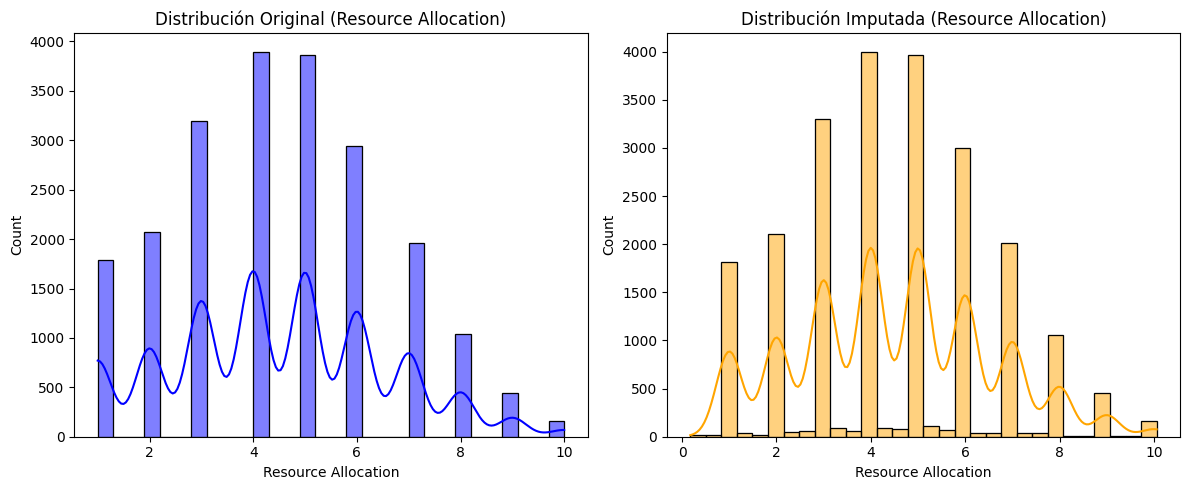


Valores faltantes en Resource Allocation después de imputación: 0


In [496]:
# Copia original de Resource Allocation
original_resource_allocation = df_encoded['Resource Allocation'].copy()

# Variables relevantes para la imputación de Resource Allocation
vars_para_imputar = [
    'Burn Rate',
    'Mental Fatigue Score',
    'Resource Allocation',
    'Designation',
    'Work Hours per Week',
    'Work-Life Balance Score',
    'Recognition Frequency'
]

df_mice = df_encoded[vars_para_imputar].copy()

imputer = IterativeImputer(max_iter=10, random_state=42)

df_imputed = imputer.fit_transform(df_mice)
df_imputed = pd.DataFrame(df_imputed, columns=vars_para_imputar)

df_encoded['Resource Allocation'] = df_imputed['Resource Allocation']

# Validación y análisis post-imputación
print("Estadísticas - Resource Allocation Original vs Imputado")
print(pd.DataFrame({
    'Original': original_resource_allocation.describe(),
    'Imputado': df_encoded['Resource Allocation'].describe()
}))

# Comparación visual
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_resource_allocation.dropna(), kde=True, color='blue', bins=30)
plt.title('Distribución Original (Resource Allocation)')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Resource Allocation'], kde=True, color='orange', bins=30)
plt.title('Distribución Imputada (Resource Allocation)')
plt.tight_layout()
plt.show()

# Verificar que no quedan nulos
print("\nValores faltantes en Resource Allocation después de imputación:", df_encoded['Resource Allocation'].isnull().sum())

### Conclusión para imputación sobre resource allocation
Tras analizar las métricas y comparar las distribuciones de "Resource Allocation" antes y después de la imputación, se puede concluir que ambas gráficas son muy similares, lo que indica que el método de imputación utilizado fue adecuado y no introdujo sesgos significativos en los datos


### Analisis e imputación para Mental Fatigue Score

Mental Fatigue Score presenta una proporción significativa de valores faltantes, aproximadamente un 9%. Además, en el análisis previo, se observó que tiene fuertes correlaciones con variables como "Burn Rate" (0.94), "Resource Allocation" (0.80), y otras relacionadas con la carga de trabajo y bienestar. Esto indica que la relación entre "Mental Fatigue Score" y estas variables es compleja, potencialmente no lineal y multivariada.

Estadísticas - Mental Fatigue Score Original vs Imputado
           Original      Imputado
count  20633.000000  22750.000000
mean       5.728188      5.723784
std        1.920839      1.911063
min        0.000000      0.000000
25%        4.600000      4.500000
50%        5.900000      5.874487
75%        7.100000      7.100000
max       10.000000     10.000000


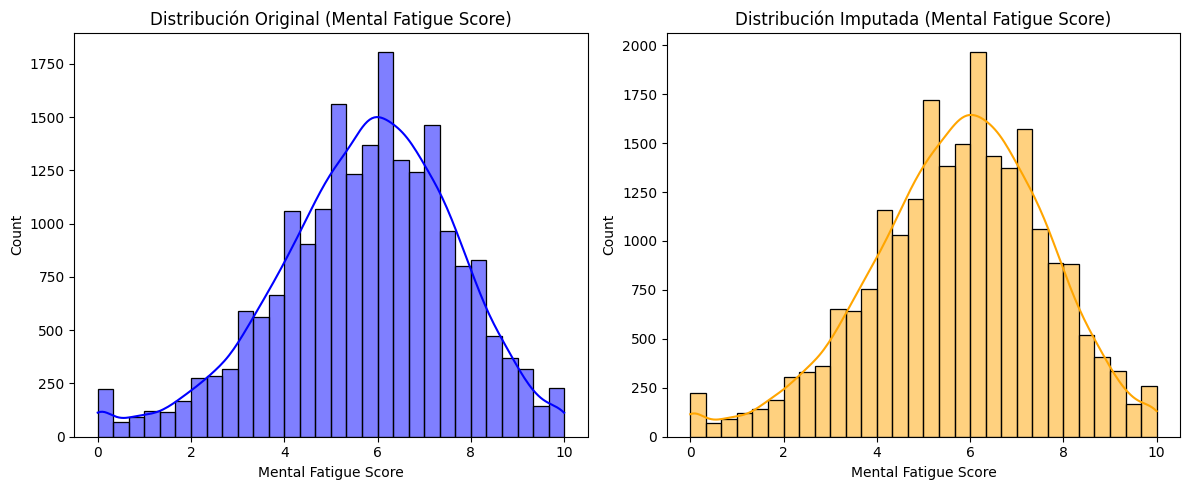


Valores faltantes en Mental Fatigue Score después de imputación: 0


In [497]:
# Copia original de Mental Fatigue Score
original_fatigue = df_encoded['Mental Fatigue Score'].copy()

# Variables relevantes para la imputación
vars_para_imputar = [
    'Burn Rate',                
    'Mental Fatigue Score',    
    'Resource Allocation',      
    'Designation',             
    'Work Hours per Week',        
    'Work-Life Balance Score',    
    'Recognition Frequency'       
]

# Crear subconjunto para MICE
df_mice_fatigue = df_encoded[vars_para_imputar].copy()

# Configurar el imputador MICE
imputer_fatigue = IterativeImputer(max_iter=10, random_state=42)

# Realizar la imputación
df_imputed_fatigue = imputer_fatigue.fit_transform(df_mice_fatigue)
df_imputed_fatigue = pd.DataFrame(df_imputed_fatigue, columns=vars_para_imputar)

# Reemplazar valores de "Mental Fatigue Score"
df_encoded['Mental Fatigue Score'] = df_imputed_fatigue['Mental Fatigue Score'].clip(lower=0, upper=10)

# Validación y análisis post-imputación
print("Estadísticas - Mental Fatigue Score Original vs Imputado")
print(pd.DataFrame({
    'Original': original_fatigue.describe(),
    'Imputado': df_encoded['Mental Fatigue Score'].describe()
}))

# Comparación visual
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_fatigue.dropna(), kde=True, color='blue', bins=30)
plt.title('Distribución Original (Mental Fatigue Score)')

plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Mental Fatigue Score'], kde=True, color='orange', bins=30)
plt.title('Distribución Imputada (Mental Fatigue Score)')
plt.tight_layout()
plt.show()

# Verificar que no quedan nulos
print("\nValores faltantes en Mental Fatigue Score después de imputación:", df_encoded['Mental Fatigue Score'].isnull().sum())

### Conclusión para imputación sobre mental fatigue score
Tanto las métricas como las gráficas muestran que luego de la imputación, la distribución de las variables sigue el mismo patrón y formato, por lo que se concluye que el método de imputación elegido es correcto ya que no se ha modificado dicha distribución ni se ha introducido ningún tipo de sesgo. 


## Análisis de Outliers

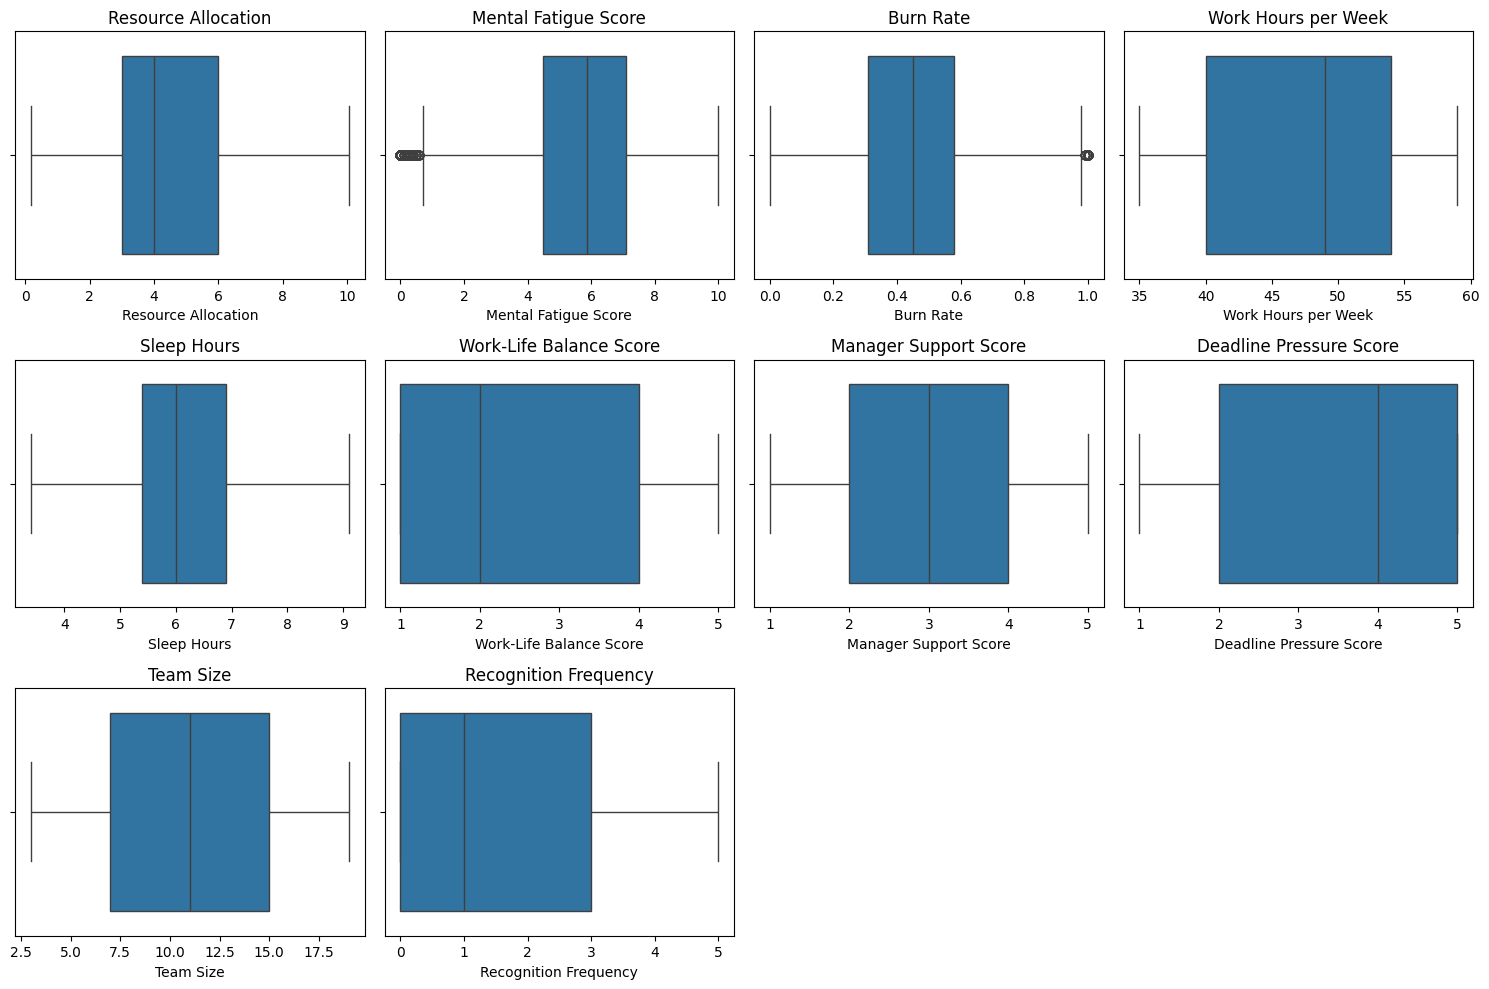

In [468]:
# Analisis de outliers
# comenzamos con los boxplots para tener una primera visualización de los outliers
# Lista de variables numéricas a analizar para outliers
variables = [
    'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate',
    'Work Hours per Week', 'Sleep Hours', 'Work-Life Balance Score',
    'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency'
]

# Crear la figura con subplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df_encoded[var])
    plt.title(var)

plt.tight_layout()
plt.show()

In [526]:
# Excluir columnas problemáticas
numeric_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['Gender_Male', 'Company Type_Service', 'WFH Setup Available_Yes']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
df_numeric = df_encoded[numeric_cols]


# 2. Calcular IQR y límites
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Ajustar límites para variables con escalas conocidas
bounds_adjustments = {
    'Burn Rate': (0.0, 1.0),
    'Mental Fatigue Score': (0.0, 10.0),
    'Work-Life Balance Score': (1.0, 5.0),
    'Manager Support Score': (1.0, 5.0),
    'Deadline Pressure Score': (1.0, 5.0),
    'Recognition Frequency': (0.0, 5.0)
}

for var, (min_val, max_val) in bounds_adjustments.items():
    lower_bound[var] = max(lower_bound[var], min_val)
    upper_bound[var] = min(upper_bound[var], max_val)

# 4. Identificar outliers válidos
outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)

# 5. Resumen de outliers
outlier_summary = pd.DataFrame({
    'Variable': numeric_cols,
    'Total Outliers': outliers.sum(),
    'Límite Inferior': lower_bound.values,
    'Límite Superior': upper_bound.values
})

print("Resumen de Outliers:")
print(outlier_summary.to_string(index=False))

Resumen de Outliers:
               Variable  Total Outliers  Límite Inferior  Límite Superior
            Designation               0            -2.00            6.000
    Resource Allocation               0            -1.50           10.500
   Mental Fatigue Score             292             0.60           10.000
              Burn Rate              93             0.00            0.985
    Work Hours per Week               0            19.00           75.000
            Sleep Hours               0             3.15            9.150
Work-Life Balance Score               0             1.00            5.000
  Manager Support Score               0             1.00            5.000
Deadline Pressure Score               0             1.00            5.000
              Team Size               0            -5.00           27.000
  Recognition Frequency               0             0.00            5.000


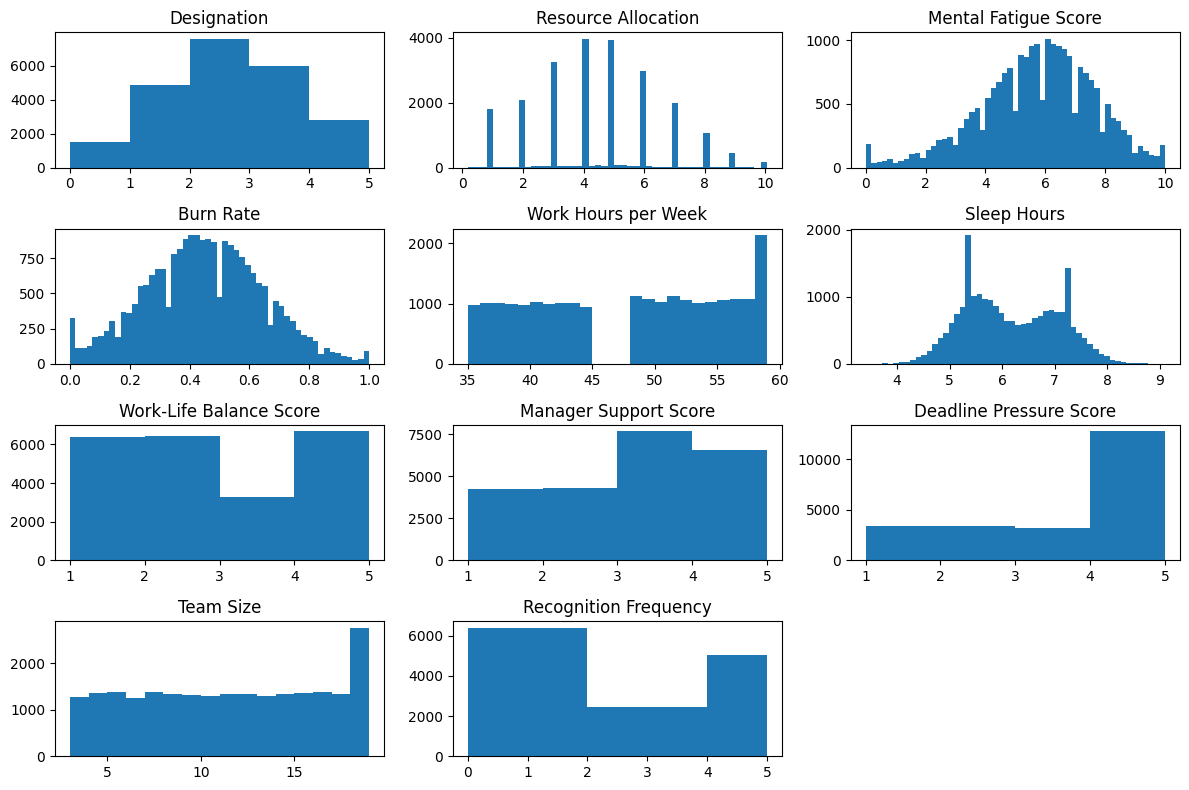

In [470]:
df_numeric.hist(bins='auto', figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

In [518]:
# Excluir columnas problemáticas
numeric_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['Gender_Male', 'Company Type_Service', 'WFH Setup Available_Yes']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
df_numeric = df_encoded[numeric_cols]

# 2. Calcular IQR y límites
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Ajustar límites para variables con escalas conocidas
bounds_adjustments = {
    'Burn Rate': (0.0, 1.0),
    'Mental Fatigue Score': (0.0, 10.0),
    'Work-Life Balance Score': (1.0, 5.0),
    'Manager Support Score': (1.0, 5.0),
    'Deadline Pressure Score': (1.0, 5.0),
    'Recognition Frequency': (0.0, 5.0)
}

for var, (min_val, max_val) in bounds_adjustments.items():
    lower_bound[var] = max(lower_bound[var], min_val)
    upper_bound[var] = min(upper_bound[var], max_val)

# 4. Calcular outliers con porcentajes
outlier_data = []
for var in numeric_cols:
    total = df_numeric[var].count()  # Ignorar NaNs
    lower = (df_numeric[var] < lower_bound[var]).sum()
    upper = (df_numeric[var] > upper_bound[var]).sum()
    
    outlier_data.append({
        'Variable': var,
        'Total Outliers': lower + upper,
        '% Inferior': round(lower/total*100, 2),
        '% Superior': round(upper/total*100, 2)
    })

# 5. Crear resumen
outlier_summary = pd.DataFrame(outlier_data)

print("Resumen de Outliers:")
print(outlier_summary.to_string(index=False))

Resumen de Outliers:
               Variable  Total Outliers  % Inferior  % Superior
            Designation               0        0.00        0.00
    Resource Allocation               0        0.00        0.00
   Mental Fatigue Score             292        1.28        0.00
              Burn Rate              93        0.00        0.41
    Work Hours per Week               0        0.00        0.00
            Sleep Hours               0        0.00        0.00
Work-Life Balance Score               0        0.00        0.00
  Manager Support Score               0        0.00        0.00
Deadline Pressure Score               0        0.00        0.00
              Team Size               0        0.00        0.00
  Recognition Frequency               0        0.00        0.00


In [519]:
outliers_mental_fatigue = df_encoded[outliers['Mental Fatigue Score']]

# Analizar por allocation, empresa o designación
print("Outliers de Mental Fatigue Score por resource allocation:\n", outliers_mental_fatigue['Resource Allocation'].value_counts())
print("\nOutliers de Mental Fatigue Score por tipo de empresa:\n", outliers_mental_fatigue['Company Type_Service'].value_counts())
print("\nOutliers de Mental Fatigue Scorepor designación:\n", outliers_mental_fatigue['Designation'].value_counts())
print("\nOutliers de Mental Fatigue Score por work hours peer week:\n", outliers_mental_fatigue['Work Hours per Week'].value_counts())

Outliers de Mental Fatigue Score por resource allocation:
 Resource Allocation
1.000000    242
2.000000     34
1.409125      1
1.163561      1
0.401983      1
0.283692      1
1.350903      1
1.235023      1
1.285916      1
0.384822      1
0.317459      1
1.350421      1
0.334092      1
0.205454      1
0.255927      1
1.246478      1
1.243608      1
0.503022      1
Name: count, dtype: int64

Outliers de Mental Fatigue Score por tipo de empresa:
 Company Type_Service
1    181
0    111
Name: count, dtype: int64

Outliers de Mental Fatigue Scorepor designación:
 Designation
0    177
1    115
Name: count, dtype: int64

Outliers de Mental Fatigue Score por work hours peer week:
 Work Hours per Week
42    40
36    35
35    34
44    31
37    30
41    26
40    26
38    24
39    23
43    23
Name: count, dtype: int64


In [520]:
outliers_burn_rate = df_encoded[outliers['Burn Rate']]

print("Outliers de Burn Rate por resource allocation:\n", outliers_burn_rate['Resource Allocation'].value_counts())
print("\nOutliers de Burn Rate por tipo de empresa:\n", outliers_burn_rate['Company Type_Service'].value_counts())
print("\nOutliers de Burn Rate por designación:\n", outliers_burn_rate['Designation'].value_counts())
print("\nOutliers de Burn Rate por work hours per week:\n", outliers_burn_rate['Work Hours per Week'].value_counts())

Outliers de Burn Rate por resource allocation:
 Resource Allocation
10.000000    36
9.000000     34
8.000000     12
7.000000      2
10.058774     1
9.024101      1
10.015830     1
9.949516      1
9.052619      1
8.097034      1
9.017471      1
9.977808      1
8.108166      1
Name: count, dtype: int64

Outliers de Burn Rate por tipo de empresa:
 Company Type_Service
1    62
0    31
Name: count, dtype: int64

Outliers de Burn Rate por designación:
 Designation
5    45
4    40
3     8
Name: count, dtype: int64

Outliers de Burn Rate por work hours per week:
 Work Hours per Week
48    12
50    12
51    11
55    11
57    10
52     7
59     6
53     6
49     5
58     5
54     4
56     4
Name: count, dtype: int64


Teniendo en cuenta que los outliers no son pocos, y estan relacionados con la variable objetivo, se decide mantenerlos en el dataset y analizar el porque de estos casos, y comprender que puede generar estos casos atípicos. 

## Análisis de relaciones entre variables

En base a todo lo previamente analizado, se procede a realizar un análisis más exahustivo de algunas relaciones específicas, que pueden 
resultar de gran importancia para el estudio de las tendencias del burnout corporativo

### Variación entre Burnout y Tipo de compañia
¿Existen diferencias significativas en los niveles de agotamiento laboral entre
empleados de diferentes tipos de compañías?


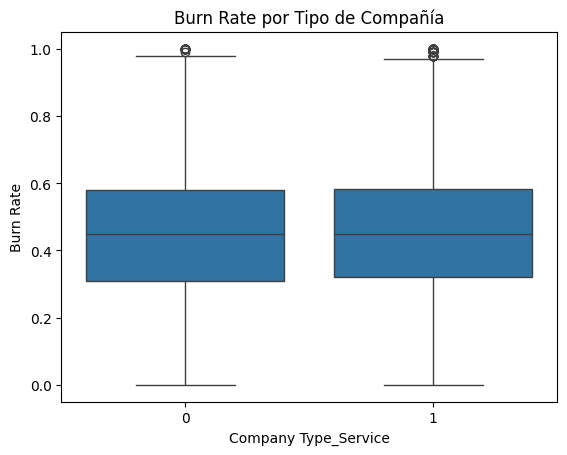

In [533]:
# Boxplot
sns.boxplot(x="Company Type_Service", y="Burn Rate", data=df_encoded)
plt.title("Burn Rate por Tipo de Compañía")
plt.show()

Si se toma como referencia la matriz de correlaciones, ya se veía que la relación entre el tipo de compañia y el burn rate
era muy baja. El gráfico de cajas confirma este supuesto, ya que no se observan diferencias entre ambas gráficas, por lo que no hay ninguna evidencia que sugiera que el tipo de compañia puede tener cierta influencia en el burn rate. 

### Variación del burnout por antigüedad, género, puesto y WFH
¿Cómo varía el nivel de burnout según la antigüedad de los empleados, el género, el
puesto y la disponibilidad de arreglos para trabajar en forma remota?


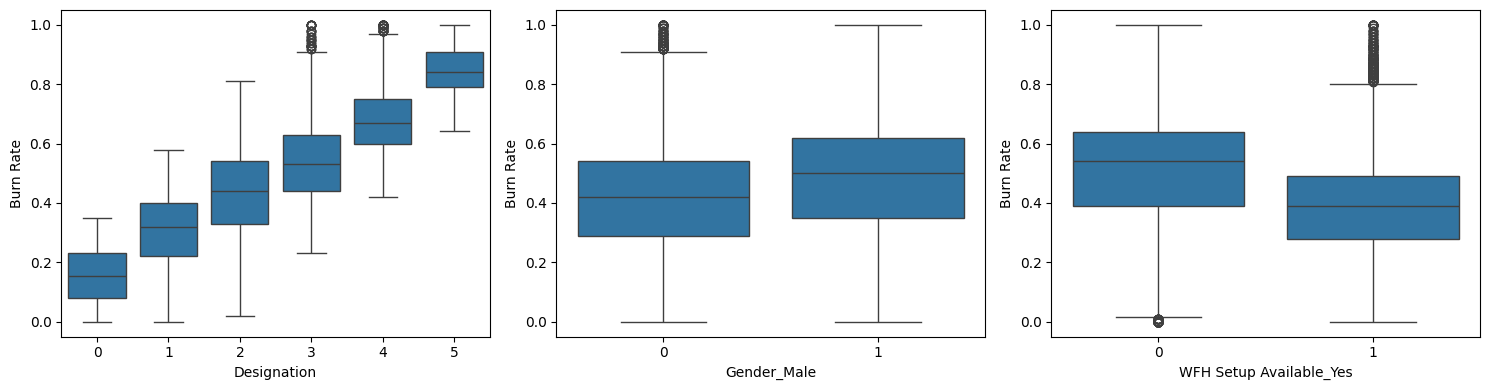

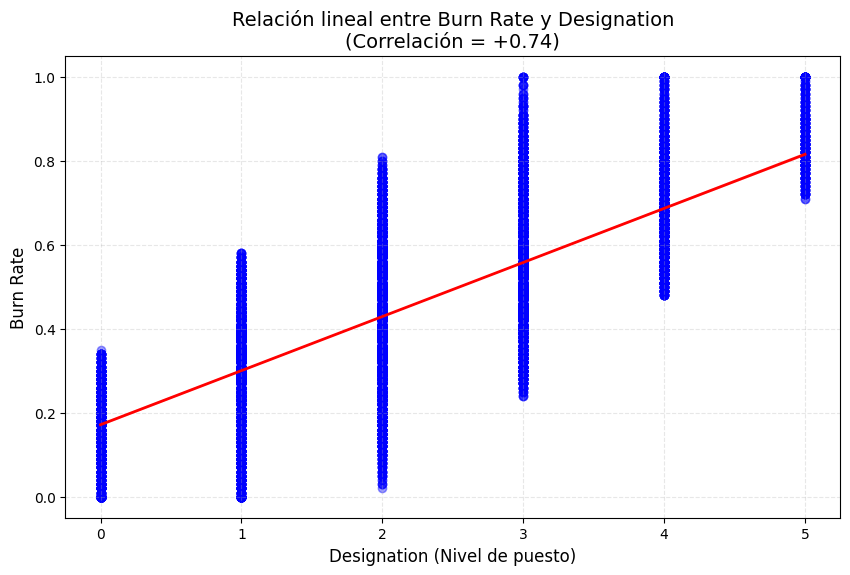

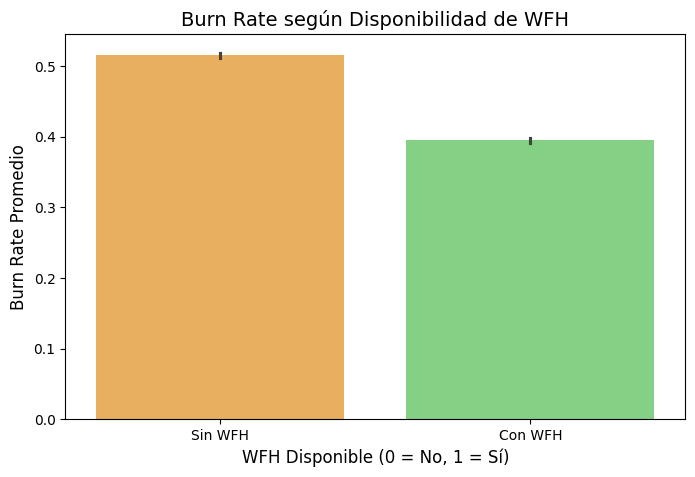

In [539]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(x="Designation", y="Burn Rate", data=df_encoded, ax=axes[0])
sns.boxplot(x="Gender_Male", y="Burn Rate", data=df_encoded, ax=axes[1])
sns.boxplot(x="WFH Setup Available_Yes", y="Burn Rate", data=df_encoded, ax=axes[2])
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(
    x="Designation", 
    y="Burn Rate", 
    data=df, 
    scatter_kws={"alpha": 0.4, "color": "blue"},  # Transparencia para superposición de puntos
    line_kws={"color": "red", "linewidth": 2},     # Línea de regresión destacada
    ci=95                                        # Intervalo de confianza del 95%
)

plt.title("Relación lineal entre Burn Rate y Designation\n(Correlación = +0.74)", fontsize=14)
plt.xlabel("Designation (Nivel de puesto)", fontsize=12)
plt.ylabel("Burn Rate", fontsize=12)
plt.grid(linestyle="--", alpha=0.3)
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(
    x="WFH Setup Available_Yes",
    y="Burn Rate",
    data=df_encoded,
    hue="WFH Setup Available_Yes",  # Add hue parameter
    palette=["#FFB347", "#77DD77"],
    errorbar=('ci', 95),  # Replace deprecated ci parameter
    legend=False  # Hide redundant legend
)
plt.title("Burn Rate según Disponibilidad de WFH", fontsize=14)
plt.xlabel("WFH Disponible (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Burn Rate Promedio", fontsize=12)
plt.xticks([0, 1], ["Sin WFH", "Con WFH"])
plt.show()

Como se observó al principio del análisis, la mayoria de los empleados, el 98,4 %, tienen 16 años de antiguedad en la empresa, y 1,6 restante 17 años, por que no resulta relevante para el análisis y es por eso que se decidió descartar el dato antiguedad. 

#### Relacion Burnout vs Designation
En cuanto a la relación entre Burnout y Designation se observa una clara relación lineal, en la que empleados con un mayor cargo como pueden ser Gerentes, managers, directores, etc tienen un mayor burnout que los empleados de puestos mas bajos. 
Algo curioso son los outliers que se observan en puestos medios. Estos outliers podrian deberse a empleados que estan tomando mas responsabilidades que las que su puesto requiere o demanda, lo que podria estar generando el burnout en este tipo de puestos. 
Se sugiere analizar estos casos puntuales, ya que pueden haber empleados que esten desarollando tareas que exceden su puesto.

#### Relacion Burnout vs WFH setup
Se observa que el Burn Rate promedio es ligeramente en empleados con WFH, vs con aquellos que no disponen de la posibilidad de trabajo remoto. Sin embargo, se observa un gran número de outliers en el grupo con WFH. Esto puede deberse a diversos factores:
    -Ambiente laboral inadecuado en casa
    -Aislamiento social
    -Falta de soporte gerencial

Se sugiere analizar estos casos, tal vez se deba aumentar la periodicidad de reuniones estilo 1:1 con estos empleados para que sientan una mayor soporte desde el lado del management, o indagar si carecen de algún equipamiento para desarrollar su trabajo de manera exitosa desde su casa. 

#### Relación Burnout vs Gender
Aunque las mujeres muestran un Burn Rate promedio más bajo que los hombres, la presencia de más outliers en este grupo sugiere que un subconjunto de mujeres experimenta niveles excepcionalmente altos de agotamiento. Esto puede deberse a factores estructurales, culturales o contextuales que afectan de manera desigual a distintas subpoblacione


### Equilibrio entre trabajo, vida personal, y cantidad de horas de sueño VS Burnout
¿Cómo influye el equilibrio entre el trabajo y la vida personal, y la cantidad de horas
de descanso en los niveles de agotamiento laboral?


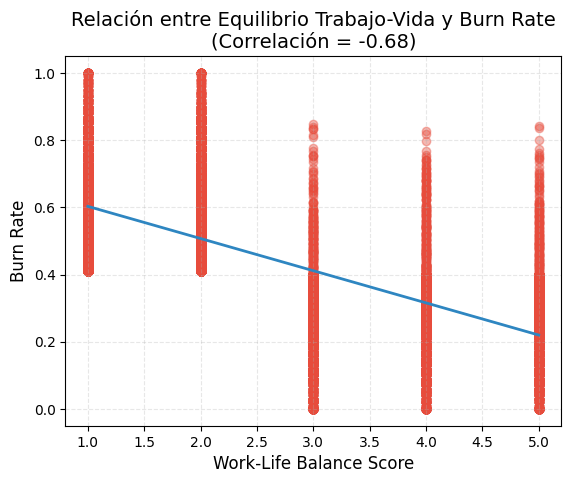

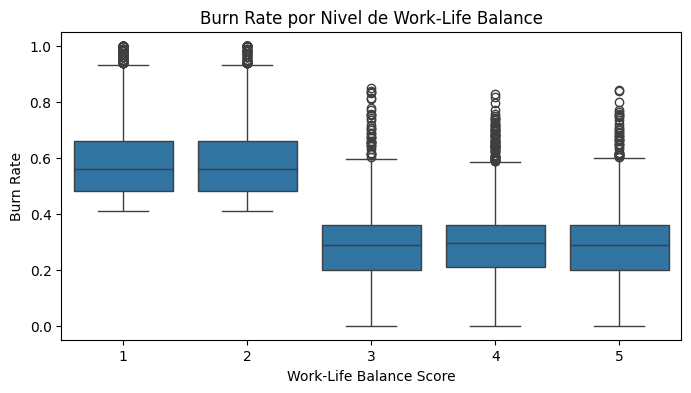

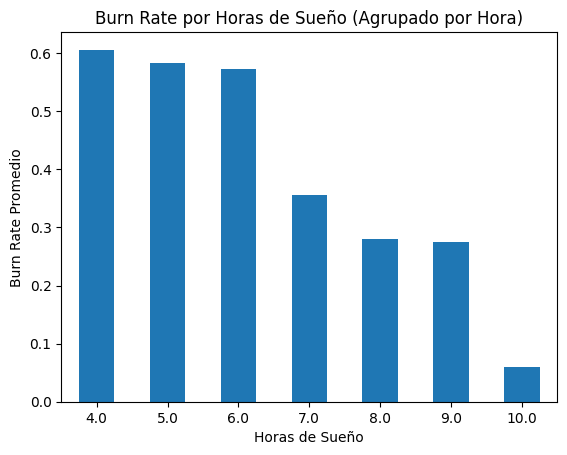

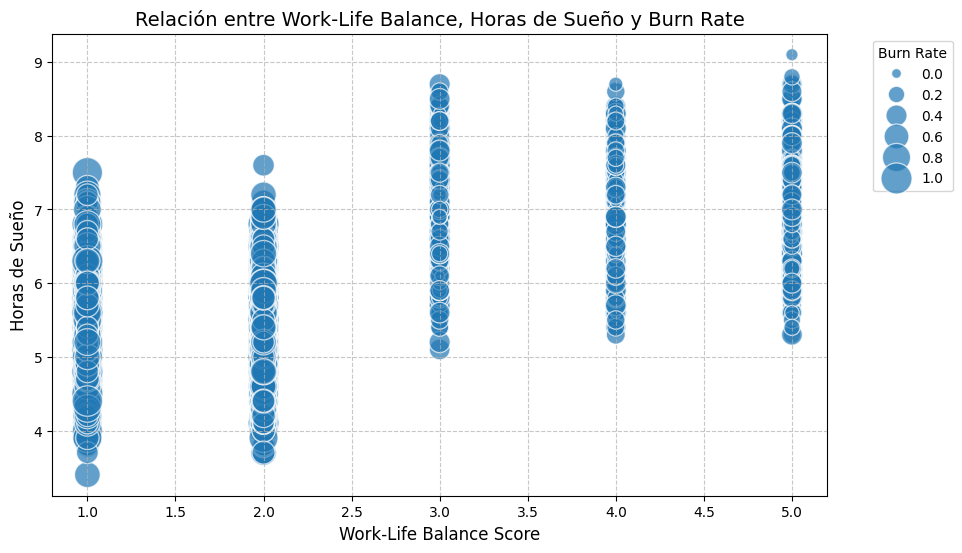

In [556]:
sns.regplot(
    x="Work-Life Balance Score", 
    y="Burn Rate", 
    data=df_encoded, 
    scatter_kws={"alpha": 0.4, "color": "#E74C3C"}, 
    line_kws={"color": "#2E86C1", "lw": 2}, 
    ci=95
)
plt.title("Relación entre Equilibrio Trabajo-Vida y Burn Rate\n(Correlación = -0.68)", fontsize=14)
plt.xlabel("Work-Life Balance Score", fontsize=12)
plt.ylabel("Burn Rate", fontsize=12)
plt.grid(linestyle="--", alpha=0.3)
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x="Work-Life Balance Score", y="Burn Rate", data=df_encoded)
plt.title("Burn Rate por Nivel de Work-Life Balance", fontsize=12)
plt.xlabel("Work-Life Balance Score", fontsize=10)
plt.ylabel("Burn Rate", fontsize=10)
plt.show()

# Crear la columna 'Rango_Horas_Sueño' redondeando hacia arriba a la hora más cercana
df_encoded['Rango_Horas_Sueño'] = np.ceil(df['Sleep Hours'])

# Calcular el Burn Rate promedio por rango de horas de sueño y graficar
df_encoded.groupby('Rango_Horas_Sueño')['Burn Rate'].mean().plot(kind='bar')
plt.xlabel('Horas de Sueño')
plt.ylabel('Burn Rate Promedio')
plt.title('Burn Rate por Horas de Sueño (Agrupado por Hora)')
plt.xticks(rotation=0)
plt.show()


# Crear el gráfico de dispersión con burbujas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Work-Life Balance Score', 
    y='Sleep Hours', 
    size='Burn Rate', 
    sizes=(50, 500),  # Rango de tamaños de las burbujas
    alpha=0.7,        # Transparencia de las burbujas
    data=df
)

# Personalizar el gráfico
plt.title('Relación entre Work-Life Balance, Horas de Sueño y Burn Rate', fontsize=14)
plt.xlabel('Work-Life Balance Score', fontsize=12)
plt.ylabel('Horas de Sueño', fontsize=12)
plt.legend(title='Burn Rate', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.grid(True, linestyle='--', alpha=0.7)  # Agregar una cuadrícula
plt.show()



#### Burn rate vs Horas de sueño
Como era de preveerse, se observa que empleados con mayores horas de sueño, reportan un menor índice de burnout, es decir a mayor cantidad de horas de sueño, menos es el burnout reportado. 

#### Burn rate vs Work-Life Balance
Logicamente, los empleados que reportaron tener un mayor score entre Work-Life balance, tienden a tener un menor porcentaje de burnout. En el gráfico se muestra como para los niveles 1 y 2 de work life balance, se encuentran los mayores índices de burnout. 

#### Relación entre Burn rate, work-life balance y las horas de sueño
En la matriz de correlaciones, se observó que había una relación muy alta entre work-life balance y horas de sueño, lo que sugiere que personas que tienen mayor cantidad de horas de sueño, lo asocian a un mejor manejo entre carga laboral y vida personal. Lo cual, con el apoyo del gráfico de burbujas, refleja que en el extremo superior derecho se encuentra el mayor porcentaje de burbujas pequeñas, es decir empleados con un burnout bajo. Mientras que por el contrario, en la esquina inferior izquierda, se concentran la mayor cantidad de burbujas grandes, lo que sugiere que empleados con pocas horas de sueño y un pobre balance entre vida personal y trabajo, tienen los mayores índices de burnout. 

### Relación entre apoyo gerencial y Burn rate
¿En qué medida el apoyo percibido de la organización reduce los niveles de
agotamiento laboral entre los empleados?

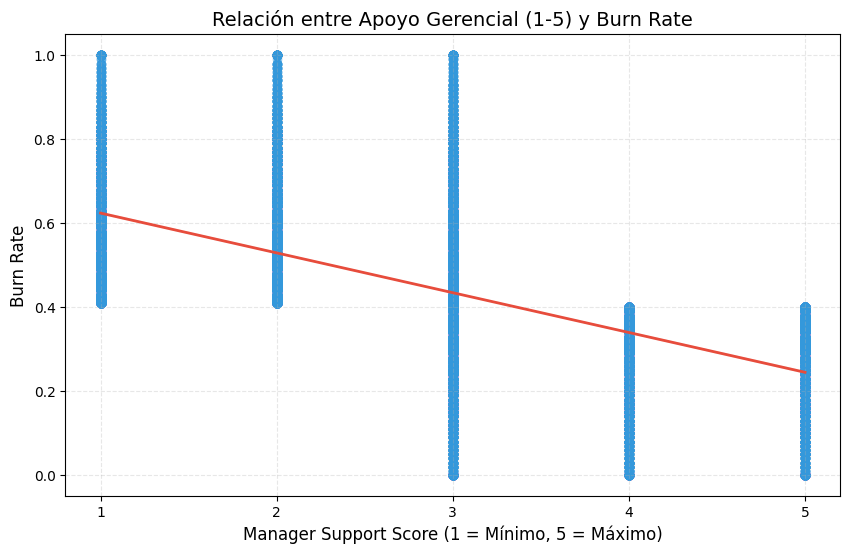

C:\Users\fg_ma\AppData\Local\Temp\ipykernel_24920\3255167555.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
C:\Users\fg_ma\AppData\Local\Temp\ipykernel_24920\3255167555.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


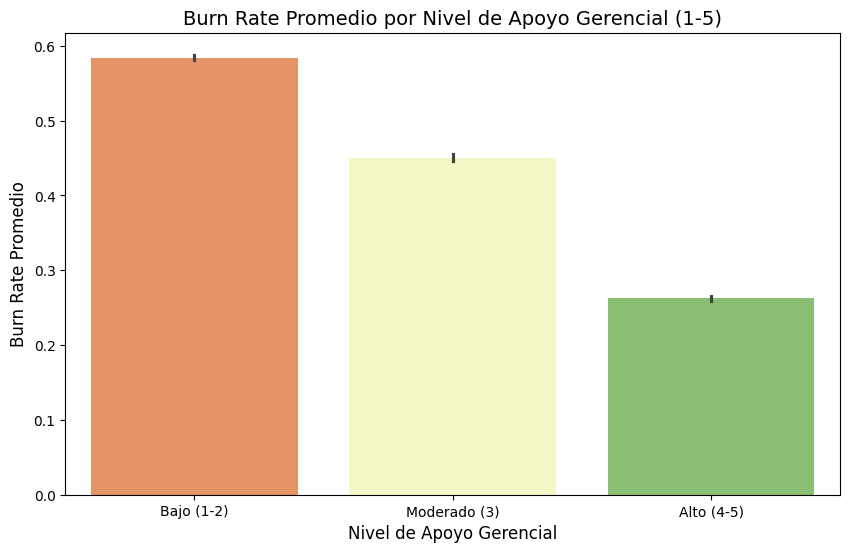

In [563]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Manager Support Score", 
    y="Burn Rate", 
    data=df, 
    scatter_kws={"alpha": 0.4, "color": "#3498DB"}, 
    line_kws={"color": "#E74C3C", "lw": 2}, 
    ci=95
)
plt.title("Relación entre Apoyo Gerencial (1-5) y Burn Rate", fontsize=14)
plt.xlabel("Manager Support Score (1 = Mínimo, 5 = Máximo)", fontsize=12)
plt.ylabel("Burn Rate", fontsize=12)
plt.grid(linestyle="--", alpha=0.3)
plt.xticks(range(1, 6))  # Asegurar que el eje X muestre solo valores de 1 a 5
plt.show()



df["Manager Support Category"] = pd.cut(
    df["Manager Support Score"], 
    bins=[1, 2, 3, 5], 
    labels=["Bajo (1-2)", "Moderado (3)", "Alto (4-5)"]
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Manager Support Category", 
    y="Burn Rate", 
    data=df, 
    palette="RdYlGn", 
    ci=95,
    order=["Bajo (1-2)", "Moderado (3)", "Alto (4-5)"]
)
plt.title("Burn Rate Promedio por Nivel de Apoyo Gerencial (1-5)", fontsize=14)
plt.xlabel("Nivel de Apoyo Gerencial", fontsize=12)
plt.ylabel("Burn Rate Promedio", fontsize=12)
plt.show()

#### Apoyo Gerencial VS Burn rate
Existe una correlación significativa (-0.59) inversa entre el apoyo gerencial y el Burn Rate.

Por cada punto adicional en el Manager Support Score (1-5), el Burn Rate disminuye 0.22 puntos (ej: de 0.8 a 0.58 con un aumento de 1 a 3 en apoyo).

Umbral crítico de soporte gerencial:

En niveles bajos de apoyo (1-2), el Burn Rate nunca desciende por debajo de 0.4, incluso en empleados con equilibrio trabajo-vida adecuado o bajo carga laboral.

En niveles altos (4-5), el Burn Rate se mantiene por debajo de 0.3 (con un mínimo de 0.16 en el percentil 95).

Es una variable estrategicamente controlable:

A diferencia de factores como las horas de sueño o el equilibrio personal, el apoyo gerencial es un factor modificable mediante políticas internas (ej: capacitación, cultura organizacional).